## Blending and Pasting Images

* Often we will be working with multiple images.
* OpenCV has many programming methods of blending images together and pasting images on top of each other.
* Blending images is done through the addWeighted function that uses both images and combines them.
  To blend images we use a simple formule:
        
  new_pixel = α x pixel_1 + β x pixel_2 + γ

  All your doing is a weighted sum. If you want the image from pixel_1 to be more represented, Just make a higher 'α' value.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img1=cv2.imread('./Images/Mohanlal.jpg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2=cv2.imread('./Images/mamooty.jpg')
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


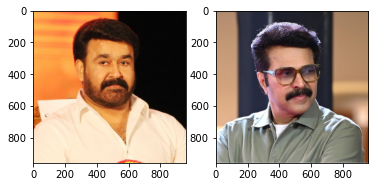

In [17]:
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

In [4]:
print(f" Shape of image1 is {img1.shape}")
print(f" Shape of image2 is {img2.shape}")

 Shape of image1 is (960, 960, 3)
 Shape of image2 is (960, 960, 3)


* Here images are of the same shape.

* If images were of different shapes, we need to resize imges to sequal shapes based on problem

  img1 = cv2.resize(img1, (1200,1200))
  
  img2 = cv2.resize(img2, (1200,1200))

In [ ]:
# Blend the two images using addWeighted function in opencv


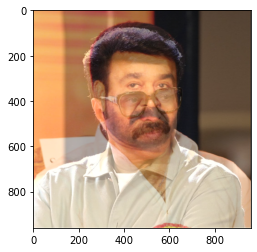

In [73]:
blended = cv2.addWeighted(src1=img1, alpha=0.6, src2= img2, beta=0.5, gamma= 1)
plt.imshow(blended)

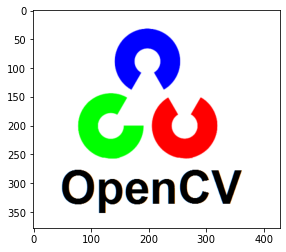

In [68]:
logo=cv2.imread('./Images/Logo.png')
plt.imshow(logo)

In [70]:
x_offset = 0
y_offset = 0
x_end = x_offset + logo.shape[1]
y_end = y_offset + logo.shape[0]

In [71]:
blended[y_offset:y_end,x_offset:x_end] = logo

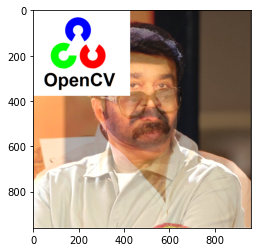

In [72]:
plt.imshow(blended)
plt.show()

In [11]:
blended.shape

(960, 960, 3)

In [12]:
logo.shape

(378, 428, 3)

In [74]:
x_offset=960-428
y_offset=960-378

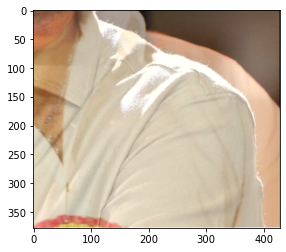

In [75]:
roi=blended[y_offset:960,x_offset:960]
plt.imshow(roi)

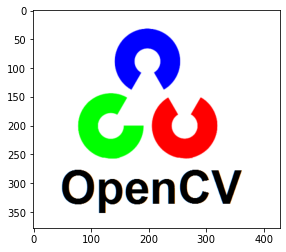

In [76]:
plt.imshow(logo)

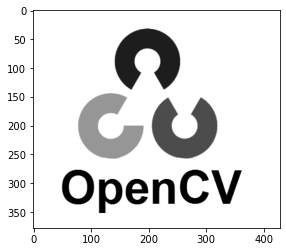

In [77]:
logo_gray=cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)
plt.imshow(logo_gray, cmap='gray')

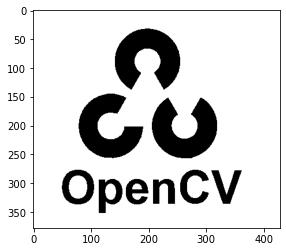

In [78]:
ret, thresh = cv2.threshold(logo_gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

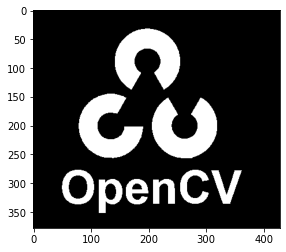

In [79]:
thresh_inv=cv2.bitwise_not(thresh)
plt.imshow(thresh_inv, cmap='gray')

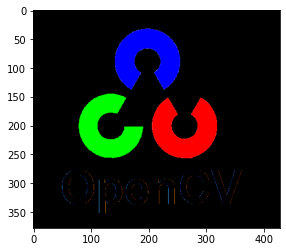

In [81]:
fg=cv2.bitwise_or(logo, logo, mask=thresh_inv)
plt.imshow(fg)

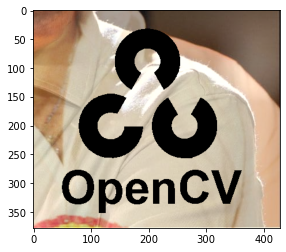

In [82]:
bg=cv2.bitwise_or(roi, roi, mask=thresh)
plt.imshow(bg)

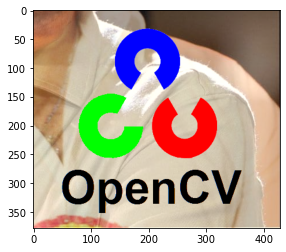

In [83]:
final_roi=cv2.add(bg,fg)
plt.imshow(final_roi)

In [84]:
blended[y_offset:960,x_offset:960]=final_roi

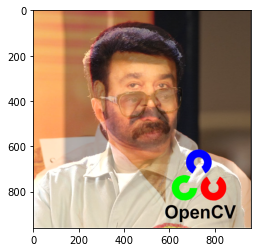

In [85]:
plt.imshow(blended)